<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This dataset is estimating the level of noise in the airfoil. The model can help predict the level of noise generated from the different size airfoils, given the frequency, angle of attack, cord length, free stream velocity and displacement thickness. Since noise generated by the airfoil could potentenially have negative impact on the environment, especially communities surrounding the airport. 

https://www.sciencedirect.com/science/article/pii/S0022460X18301342

- Find out how many rows and columns are in `noise`.

In [4]:
noise.head(2)

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [5]:
noise.shape
#1503 rows and 6 columns

(1503, 6)

- Find out what data types are present.

In [6]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [7]:
noise.isna().sum()
#no missing values

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [8]:
print(noise.var())
print(noise.std())
noise.describe()
#mean = measure of central tendency
#variance and std = measure of dispersion

frequency                 9.938717e+06
angle                     3.502424e+01
chord_length              8.749868e-03
free_stream_velocity      2.425116e+02
displacement_thickness    1.729287e-04
self_noise                4.759146e+01
dtype: float64
frequency                 3152.573137
angle                        5.918128
chord_length                 0.093541
free_stream_velocity        15.572784
displacement_thickness       0.013150
self_noise                   6.898657
dtype: float64


,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

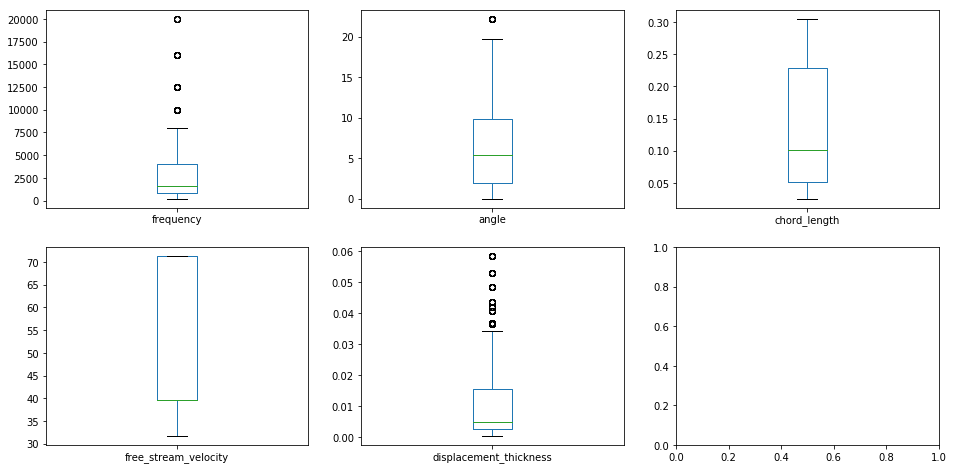

In [9]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
noise.loc[:,'frequency'].plot(kind='box', ax=axes[0,0])
noise.loc[:,'angle'].plot(kind='box', ax=axes[0,1])
noise.loc[:,'chord_length'].plot(kind='box', ax=axes[0,2])
noise.loc[:,'free_stream_velocity'].plot(kind='box', ax=axes[1,0])
noise.loc[:,'displacement_thickness'].plot(kind='box', ax=axes[1,1])

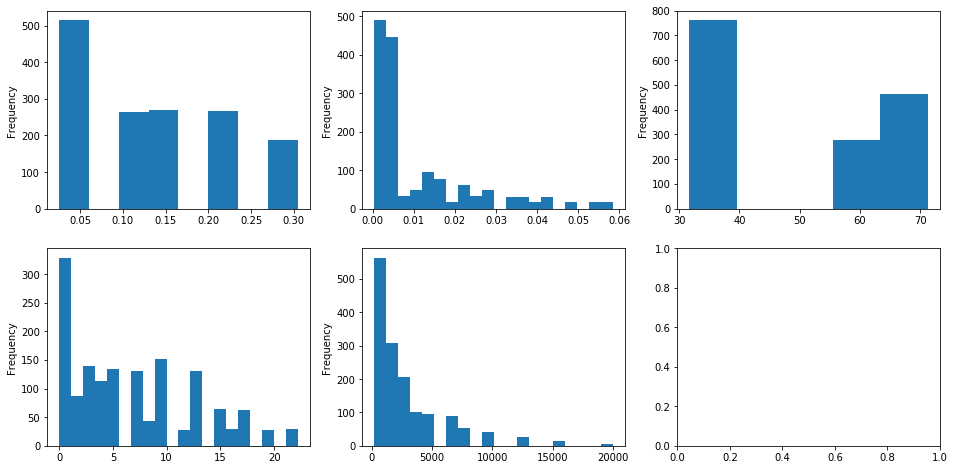

In [10]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
noise.loc[:, 'chord_length'].plot(kind='hist', bins=8, ax=axes[0,0])
noise.loc[:, 'displacement_thickness'].plot(kind='hist', bins=20, ax=axes[0,1])
noise.loc[:, 'free_stream_velocity'].plot(kind='hist', bins=5, ax=axes[0,2])
noise.loc[:, 'angle'].plot(kind='hist', bins=20, ax=axes[1,0])
noise.loc[:, 'frequency'].plot(kind='hist', bins=20, ax=axes[1,1]);

- Which variables are approximately normally distributed?

None of the variables look approximately normally distributed.

- Which variables show strong skew?

All the variables look strongly skewed right. 

- Make a scatterplot of each feature variable with the target variable.

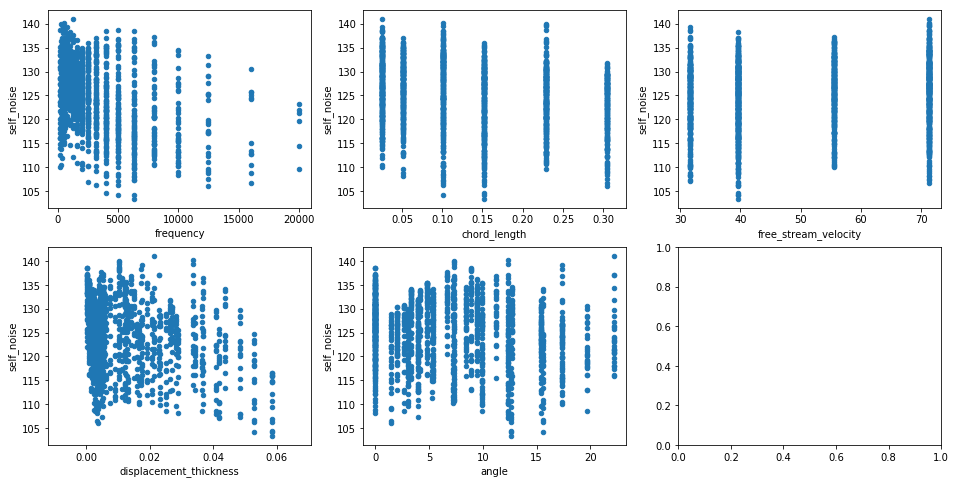

In [11]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
noise.plot(kind='scatter', x='frequency', y='self_noise', ax=axes[0,0])
noise.plot(kind='scatter', x='chord_length', y='self_noise', ax=axes[0,1])
noise.plot(kind='scatter', x='free_stream_velocity', y='self_noise', ax=axes[0,2])
noise.plot(kind='scatter', x='displacement_thickness', y='self_noise', ax=axes[1,0])
noise.plot(kind='scatter', x='angle', y='self_noise', ax=axes[1,1])

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

In [12]:
noise.corr()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
self_noise,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


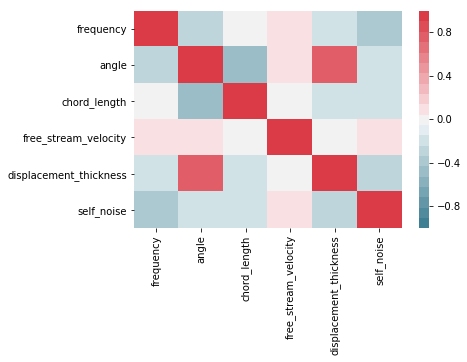

In [13]:
ax = sns.heatmap(noise.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

None of the scatterplot models actually show a linear regression between the variable and target variable. Especially the scatterplots, it does not look linear. It looks like decision tree or random forest would fit this data better. 

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [14]:
target_col = 'self_noise'
X = noise.drop(target_col, axis='columns')
y = noise.loc[:,target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.4336631213494296
0.5466512447281067


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training set compared to the null model is around 53%. As compared to predicting the mean overtime, the model predicts better 53%. This model has a high bias and low variance. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

It is underfitting. The test set is performing slightly better than the train set. It is not substantically better than the train model. It is high bias and low variance. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model appears to have a high bias problem because it is only predicting about 54% of the test data and unable to capture the patterns in the data. Low variance because the model is still very flexible. 

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [42]:
target_col = 'self_noise'
X = noise.drop(target_col, axis='columns')
y = noise.loc[:,target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)

print(rfr.score(X_test,y_test))
print(rfr.score(X_train,y_train))

0.9152904267646337
0.9901357621379282


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Lower bias than linear regression model. 
Higher variance than linear regression model. 
A lot better predictability than the linear regression model. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

1. Displacement thickness and angle both look very correlated. I could potentially try building an interaction term between displacement thickness and angle.  
2. Performing feature engineering on certain variables such as squaring the chord_length

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This dataset contains information on credit card application and it is masked to protect credit card applicants confidentiality. The dataset contains continuous, discrete and categorical data. According to the dataset, there are missing values. This model is useful because it can help predict if a credit card applicant is going to be approved or declined for the card. This will help banks determine quicker whether that applicant will be approved or declined. 

Attribute Information:

- A1:	b, a. 
- A2:	continuous. 
- A3:	continuous. 
- A4:	u, y, l, t. 
- A5:	g, p, gg. 
- A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
- A7:	v, h, bb, j, n, z, dd, ff, o. 
- A8:	continuous. 
- A9:	t, f. 
- A10:	t, f. 
- A11:	continuous. 
- A12:	t, f. 
- A13:	g, p, s. 
- A14:	continuous. 
- A15:	continuous. 
- A16: +,- (class attribute)

In [17]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [18]:
credit.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+


In [19]:
credit.shape

(690, 16)

- Find out what data types are present.

In [20]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [21]:
credit.loc[:,2].value_counts()
#there are 12 special character '?' 

?        12
22.67     9
20.42     7
24.50     6
20.67     6
22.50     6
19.17     6
25.00     6
18.83     6
23.58     6
23.08     5
23.25     5
23.00     5
33.17     5
27.67     5
27.83     5
32.33     4
25.17     4
24.75     4
35.17     4
25.67     4
22.08     4
34.17     4
41.17     4
28.58     4
29.50     4
26.17     4
23.50     4
20.75     4
26.67     4
         ..
47.17     1
60.58     1
32.17     1
47.25     1
52.17     1
31.00     1
56.00     1
34.58     1
62.75     1
58.42     1
36.42     1
52.33     1
39.00     1
24.17     1
28.08     1
34.67     1
73.42     1
36.58     1
47.75     1
48.50     1
27.33     1
30.75     1
18.75     1
60.92     1
33.92     1
54.58     1
65.42     1
25.92     1
33.00     1
18.50     1
Name: 2, Length: 350, dtype: int64

In [22]:
credit.loc[credit.loc[:,2] == '?',:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
329,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
450,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,-
500,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,+


In [43]:
#This one looks at all columns to see if there is '?'
credit.loc[:,2].value_counts()
credit.loc[:,3].value_counts()
credit.loc[:,4].value_counts()
credit.loc[:,5].value_counts()
credit.loc[:,6].value_counts()
credit.loc[:,7].value_counts()
credit.loc[:,8].value_counts()
credit.loc[:,9].value_counts()
credit.loc[:,10].value_counts()
credit.loc[:,11].value_counts()
credit.loc[:,12].value_counts()
credit.loc[:,13].value_counts()
credit.loc[:,14].value_counts()
credit.loc[:,15].value_counts()

0        295
1         29
1000      10
500       10
2          9
5          8
300        8
6          8
3          6
200        6
100        6
4          5
50         5
150        4
7          4
10         4
3000       4
20         4
400        3
560        3
18         3
600        3
2000       3
5000       3
4000       3
108        2
17         2
44         2
204        2
8          2
        ... 
247        1
1270       1
396        1
4500       1
1430       1
1442       1
591        1
587        1
9800       1
582        1
1391       1
1602       1
567        1
31285      1
1583       1
6700       1
551        1
537        1
4607       1
501        1
484        1
3552       1
475        1
2510       1
458        1
2503       1
6590       1
1465       1
5552       1
283        1
Name: 15, Length: 240, dtype: int64

In [44]:
#create a credit_new to remove all the '?'
credit_new = credit.loc[credit.loc[:,1] != '?',:]
credit_new = credit_new.loc[credit_new.loc[:,2] != '?',:]
credit_new = credit_new.loc[credit_new.loc[:,4] != '?',:]
credit_new = credit_new.loc[credit_new.loc[:,5] != '?',:]
credit_new = credit_new.loc[credit_new.loc[:,6] != '?',:]
credit_new = credit_new.loc[credit_new.loc[:,7] != '?',:]
credit_new = credit_new.loc[credit_new.loc[:,14] != '?',:]

In [45]:
#replace '+'' with 1 and '-' with '0'
credit_new.loc[:,16] = credit_new.loc[:,16].replace('+','1').replace('-', '0').astype(int)
credit_new.loc[:,16]
credit_new.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16      int64
dtype: object

In [46]:
credit_new.loc[:,2] = credit_new.loc[:,2].astype(float)
#change type from object to float 

In [47]:
credit_new.dtypes
#check that is is now a float data type 

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16      int64
dtype: object

- Find out how many null values there are in each columns.

In [48]:
credit_new.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [49]:
credit_new.describe()

,2,3,8,11,15,16
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,1013.761103,0.453292
std,11.838267,5.027077,3.371120,4.968497,5253.278504,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,5.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,100000.000000,1.000000


In [30]:
credit_new.describe(include='object')

,1,4,5,6,7,9,10,12,13,14
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,164
top,b,u,g,c,v,t,f,f,g,00000
freq,450,499,499,133,381,349,366,351,598,128


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

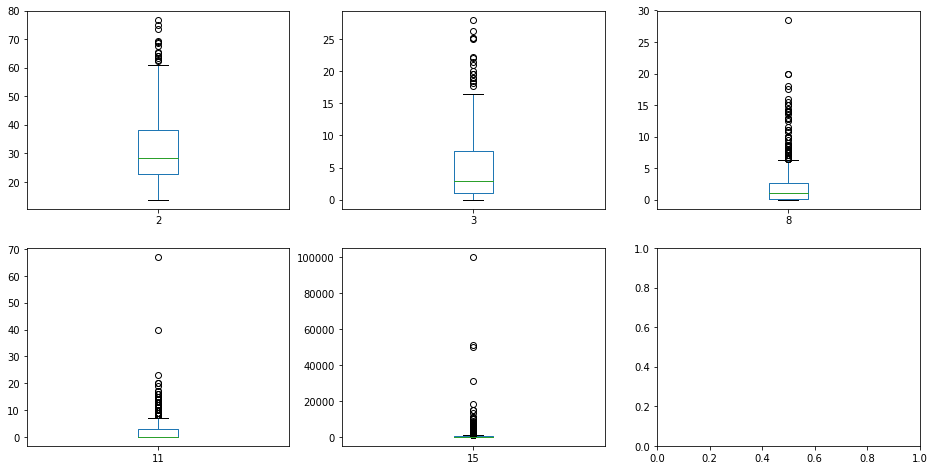

In [31]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
credit_new.loc[:,2].plot(kind='box', ax=axes[0,0])
credit_new.loc[:,3].plot(kind='box', ax=axes[0,1])
credit_new.loc[:,8].plot(kind='box', ax=axes[0,2])
credit_new.loc[:,11].plot(kind='box', ax=axes[1,0])
credit_new.loc[:,15].plot(kind='box', ax=axes[1,1]);

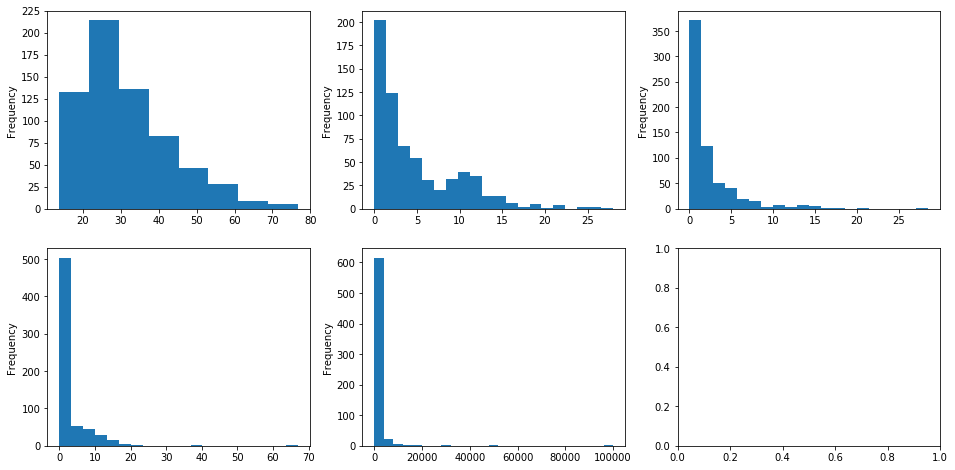

In [32]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
credit_new.loc[:,2].plot(kind='hist', bins=8, ax=axes[0,0])
credit_new.loc[:,3].plot(kind='hist', bins=20, ax=axes[0,1])
credit_new.loc[:,8].plot(kind='hist', bins=20, ax=axes[0,2])
credit_new.loc[:,11].plot(kind='hist', bins=20, ax=axes[1,0])
credit_new.loc[:,15].plot(kind='hist', bins=25, ax=axes[1,1]);

In [33]:
credit_new.describe(include='object')

,1,4,5,6,7,9,10,12,13,14
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,164
top,b,u,g,c,v,t,f,f,g,00000
freq,450,499,499,133,381,349,366,351,598,128


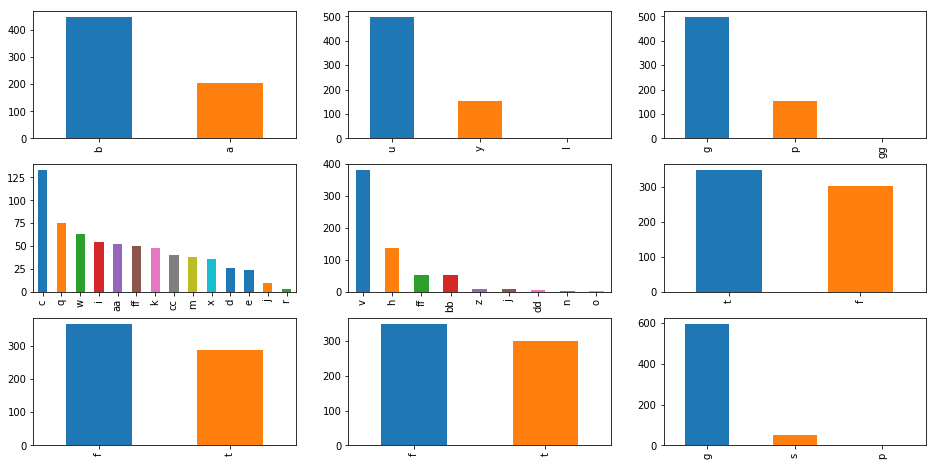

In [34]:
fig, axes = plt.subplots(3,3, figsize=(16,8))
credit_new.loc[:,1].value_counts().plot(kind='bar', ax=axes[0,0])
credit_new.loc[:,4].value_counts().plot(kind='bar', ax=axes[0,1])
credit_new.loc[:,5].value_counts().plot(kind='bar', ax=axes[0,2])
credit_new.loc[:,6].value_counts().plot(kind='bar', ax=axes[1,0])
credit_new.loc[:,7].value_counts().plot(kind='bar', ax=axes[1,1])
credit_new.loc[:,9].value_counts().plot(kind='bar', ax=axes[1,2])
credit_new.loc[:,10].value_counts().plot(kind='bar', ax=axes[2,0])
credit_new.loc[:,12].value_counts().plot(kind='bar', ax=axes[2,1])
credit_new.loc[:,13].value_counts().plot(kind='bar', ax=axes[2,2])

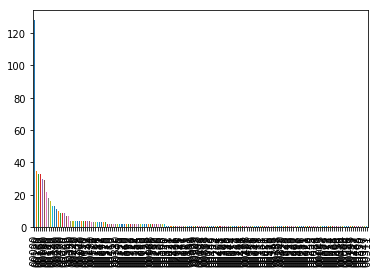

In [35]:
#bar chart for attribute 14; dtypes = object but the data is numeric 
credit_new.loc[:,14].value_counts().plot(kind='bar')

- Which variables are approximately normally distributed?

Attribute 2 looks approximately normally distributed. 

- Which variables show strong skew?

Attributes 3, 8, 11, 14, 15 appear strongly skewed right

- Make a scatterplot of each feature variable with the target variable.

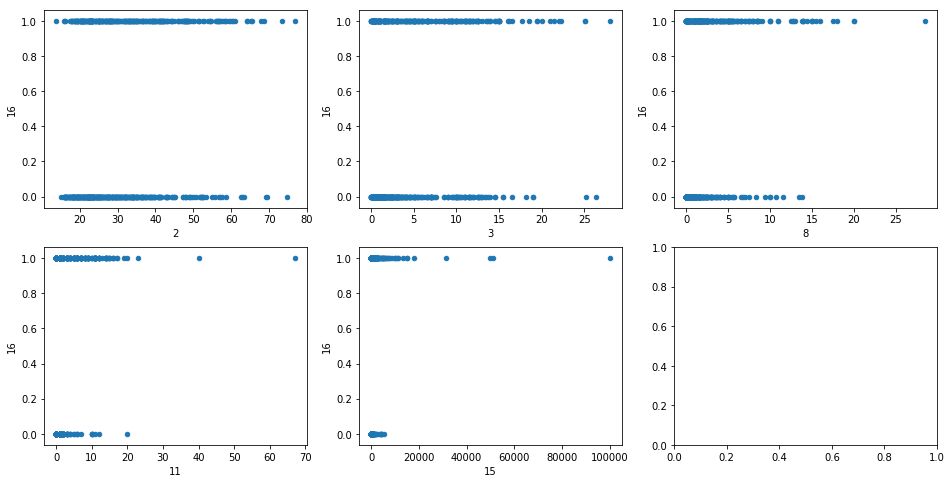

In [36]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
credit_new.plot(kind='scatter', x=2, y=16, ax=axes[0,0])
credit_new.plot(kind='scatter', x=3, y=16, ax=axes[0,1])
credit_new.plot(kind='scatter', x=8, y=16, ax=axes[0,2])
credit_new.plot(kind='scatter', x=11, y=16, ax=axes[1,0])
credit_new.plot(kind='scatter', x=15, y=16, ax=axes[1,1])

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

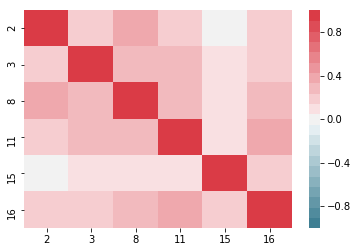

In [37]:
ax = sns.heatmap(credit_new.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

From the heatmap, a lot of the attributes look very correlated. 

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [38]:
credit_new.loc[:,16].value_counts()

0    357
1    296
Name: 16, dtype: int64

The accuracy of a null model that predicts the most common outcome each time on this dataset is 296/(296+357) = 45.33%

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on 
categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [39]:
credit_new.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16      int64
dtype: object

In [40]:
target_col = 16
X = pd.get_dummies(credit_new, columns=[1,4,5,6,7,9,10,12,13,14], drop_first=True).drop(target_col, axis='columns')
y = credit_new.loc[:,16]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9141104294478528
0.8658536585365854


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training set compared to the null model is around 90%. As compared to predicting the mean overtime, the model predicts better around 90%. This model has a low bias and high variance. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model is overfitting. The train set is performing better than the test set. It has a low bias and high variance. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model appears to have more of a variance problem because the model is already predicting well on the train set data.  

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [41]:
target_col = 16
X = pd.get_dummies(credit_new, columns=[1,4,5,6,7,9,10,12,13,14], drop_first=True).drop(target_col, axis='columns')
y = credit_new.loc[:,16]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

1.0
0.8622448979591837


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your logistic regression model.

Higher bias than logistic regression model, Lower variance than linear regression model, Higher predictive performance.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

1. Remove some feature variables because the model is overfitting. Removing some features can help with predictability. 
2. Controlling the number of decision tree in the random forest (max_depth)

- **BONUS:** Keep going! Find ways to make your model better.